# ECOWAS Zone Economics Stats
Data source: [countryeconomy.com](https://fr.countryeconomy.com/pays/groupes/communaute-economique-etats-afrique-ouest)

In this notebook, I will show you how to clean data using Pandas
1. First, I will retreive data from a web page
2. Then I will apply a set of actions to clean the data
3. Finnaly, I will save the clean data to .csv format.

## Packages

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

## 1. Get Data

**Paths & Config**

In [2]:
URL = "https://fr.countryeconomy.com/pays/groupes/communaute-economique-etats-afrique-ouest"
RAW_DATA = "raw_data.csv"
CLEAN_DATA = "clean_data.csv"

**Retreive page HTML code source**

In [3]:
# Retreive source code
source = requests.get(URL)
# Convert into bs4 object
soup = BeautifulSoup(source.text, "html.parser")
# Extract table
table = soup.find("table", {"class": "table"})

**Convert into Pandas DataFrame**

In [4]:
data = pd.read_html(str(table))[0]
data

,Pays,Population,PIB annuel,PIB annuel.1,PIB par habitant,PIB par habitant.1,IDH,Dette totale (M. €),Dette totale (M. $),Dette (%PIB),Déficit (%PIB)
0,Bénin [+],11.801.151,12.856M.€,14.392M.$,1.089€,1.220$,545.0,5.300,5.933,"41,23%","-0,54%"
1,Burkina [+],20.321.378,14.284M.€,15.991M.$,703€,787$,452.0,6.001,6.719,"42,67%","-3,46%"
2,Cap-Vert [+],549.935,1.770M.€,1.982M.$,3.219€,3.604$,665.0,2.213,2.477,"124,98%","-1,84%"
3,Côte d’Ivoire [+],25.716.544,52.291M.€,58.539M.$,2.033€,2.276$,538.0,21.553,24.128,"41,22%","-2,29%"
4,Gambie [+],2.347.706,1.631M.€,1.826M.$,695€,778$,496.0,1.190,1.406,"84,61%","-6,06%"
5,Ghana [+],30.417.856,59.846M.€,66.998M.$,1.967€,2.203$,611.0,35.065,41.412,"63,23%","-6,97%"
6,Guinée [+],12.771.246,10.984M.€,12.297M.$,860€,963$,477.0,4.533,5.075,"36,79%","-0,47%"
7,Guinée-Bissau [+],1.920.922,1.196M.€,1.339M.$,623€,697$,480.0,861.000,964.000,"66,95%","-3,92%"
8,Liberia [+],4.937.374,2.743M.€,3.071M.$,556€,622$,480.0,1.516,1.697,"55,38%","-4,62%"
9,Mali [+],19.658.031,15.435M.€,17.280M.$,785€,879$,434.0,5.220,6.165,"36,11%","-4,74%"


**Save raw data**

In [5]:
# Save raw data
data.to_csv(RAW_DATA, index=False)

## 2. Prepare Data

**Drop last row**

In [6]:
# Drop last row
data = data.drop(index=len(data)-1, axis=0)
data

,Pays,Population,PIB annuel,PIB annuel.1,PIB par habitant,PIB par habitant.1,IDH,Dette totale (M. €),Dette totale (M. $),Dette (%PIB),Déficit (%PIB)
0,Bénin [+],11.801.151,12.856M.€,14.392M.$,1.089€,1.220$,545.0,5.300,5.933,"41,23%","-0,54%"
1,Burkina [+],20.321.378,14.284M.€,15.991M.$,703€,787$,452.0,6.001,6.719,"42,67%","-3,46%"
2,Cap-Vert [+],549.935,1.770M.€,1.982M.$,3.219€,3.604$,665.0,2.213,2.477,"124,98%","-1,84%"
3,Côte d’Ivoire [+],25.716.544,52.291M.€,58.539M.$,2.033€,2.276$,538.0,21.553,24.128,"41,22%","-2,29%"
4,Gambie [+],2.347.706,1.631M.€,1.826M.$,695€,778$,496.0,1.190,1.406,"84,61%","-6,06%"
5,Ghana [+],30.417.856,59.846M.€,66.998M.$,1.967€,2.203$,611.0,35.065,41.412,"63,23%","-6,97%"
6,Guinée [+],12.771.246,10.984M.€,12.297M.$,860€,963$,477.0,4.533,5.075,"36,79%","-0,47%"
7,Guinée-Bissau [+],1.920.922,1.196M.€,1.339M.$,623€,697$,480.0,861.000,964.000,"66,95%","-3,92%"
8,Liberia [+],4.937.374,2.743M.€,3.071M.$,556€,622$,480.0,1.516,1.697,"55,38%","-4,62%"
9,Mali [+],19.658.031,15.435M.€,17.280M.$,785€,879$,434.0,5.220,6.165,"36,11%","-4,74%"


**Clean column names**

In [7]:
# Clean column names
# columns = [name.replace(".1", "") for name in list(data.columns)]
# data.columns = columns
data.columns = ["Pays", "Population", "PIB annuel (M. €)", "PIB annuel (M. $)", "PIB par habitant (€)", "PIB par habitant ($)", "IDH", "Dette totale (M. €)", "Dette totale (M. $)", "Dette (%PIB)", "Déficit (%PIB)"]
data

,Pays,Population,PIB annuel (M. €),PIB annuel (M. $),PIB par habitant (€),PIB par habitant ($),IDH,Dette totale (M. €),Dette totale (M. $),Dette (%PIB),Déficit (%PIB)
0,Bénin [+],11.801.151,12.856M.€,14.392M.$,1.089€,1.220$,545.0,5.300,5.933,"41,23%","-0,54%"
1,Burkina [+],20.321.378,14.284M.€,15.991M.$,703€,787$,452.0,6.001,6.719,"42,67%","-3,46%"
2,Cap-Vert [+],549.935,1.770M.€,1.982M.$,3.219€,3.604$,665.0,2.213,2.477,"124,98%","-1,84%"
3,Côte d’Ivoire [+],25.716.544,52.291M.€,58.539M.$,2.033€,2.276$,538.0,21.553,24.128,"41,22%","-2,29%"
4,Gambie [+],2.347.706,1.631M.€,1.826M.$,695€,778$,496.0,1.190,1.406,"84,61%","-6,06%"
5,Ghana [+],30.417.856,59.846M.€,66.998M.$,1.967€,2.203$,611.0,35.065,41.412,"63,23%","-6,97%"
6,Guinée [+],12.771.246,10.984M.€,12.297M.$,860€,963$,477.0,4.533,5.075,"36,79%","-0,47%"
7,Guinée-Bissau [+],1.920.922,1.196M.€,1.339M.$,623€,697$,480.0,861.000,964.000,"66,95%","-3,92%"
8,Liberia [+],4.937.374,2.743M.€,3.071M.$,556€,622$,480.0,1.516,1.697,"55,38%","-4,62%"
9,Mali [+],19.658.031,15.435M.€,17.280M.$,785€,879$,434.0,5.220,6.165,"36,11%","-4,74%"


**Clean `Pays` column**

In [8]:
# Clean `Pays` column
data["Pays"] = data["Pays"].apply(lambda x: x[:-4])
data

,Pays,Population,PIB annuel (M. €),PIB annuel (M. $),PIB par habitant (€),PIB par habitant ($),IDH,Dette totale (M. €),Dette totale (M. $),Dette (%PIB),Déficit (%PIB)
0,Bénin,11.801.151,12.856M.€,14.392M.$,1.089€,1.220$,545.0,5.300,5.933,"41,23%","-0,54%"
1,Burkina,20.321.378,14.284M.€,15.991M.$,703€,787$,452.0,6.001,6.719,"42,67%","-3,46%"
2,Cap-Vert,549.935,1.770M.€,1.982M.$,3.219€,3.604$,665.0,2.213,2.477,"124,98%","-1,84%"
3,Côte d’Ivoire,25.716.544,52.291M.€,58.539M.$,2.033€,2.276$,538.0,21.553,24.128,"41,22%","-2,29%"
4,Gambie,2.347.706,1.631M.€,1.826M.$,695€,778$,496.0,1.190,1.406,"84,61%","-6,06%"
5,Ghana,30.417.856,59.846M.€,66.998M.$,1.967€,2.203$,611.0,35.065,41.412,"63,23%","-6,97%"
6,Guinée,12.771.246,10.984M.€,12.297M.$,860€,963$,477.0,4.533,5.075,"36,79%","-0,47%"
7,Guinée-Bissau,1.920.922,1.196M.€,1.339M.$,623€,697$,480.0,861.000,964.000,"66,95%","-3,92%"
8,Liberia,4.937.374,2.743M.€,3.071M.$,556€,622$,480.0,1.516,1.697,"55,38%","-4,62%"
9,Mali,19.658.031,15.435M.€,17.280M.$,785€,879$,434.0,5.220,6.165,"36,11%","-4,74%"


**Format `Population` column**

In [9]:
# Format `Population` column
data["Population"] = data["Population"].apply(lambda x: int(x.replace(".", "")))
data

,Pays,Population,PIB annuel (M. €),PIB annuel (M. $),PIB par habitant (€),PIB par habitant ($),IDH,Dette totale (M. €),Dette totale (M. $),Dette (%PIB),Déficit (%PIB)
0,Bénin,11801151,12.856M.€,14.392M.$,1.089€,1.220$,545.0,5.300,5.933,"41,23%","-0,54%"
1,Burkina,20321378,14.284M.€,15.991M.$,703€,787$,452.0,6.001,6.719,"42,67%","-3,46%"
2,Cap-Vert,549935,1.770M.€,1.982M.$,3.219€,3.604$,665.0,2.213,2.477,"124,98%","-1,84%"
3,Côte d’Ivoire,25716544,52.291M.€,58.539M.$,2.033€,2.276$,538.0,21.553,24.128,"41,22%","-2,29%"
4,Gambie,2347706,1.631M.€,1.826M.$,695€,778$,496.0,1.190,1.406,"84,61%","-6,06%"
5,Ghana,30417856,59.846M.€,66.998M.$,1.967€,2.203$,611.0,35.065,41.412,"63,23%","-6,97%"
6,Guinée,12771246,10.984M.€,12.297M.$,860€,963$,477.0,4.533,5.075,"36,79%","-0,47%"
7,Guinée-Bissau,1920922,1.196M.€,1.339M.$,623€,697$,480.0,861.000,964.000,"66,95%","-3,92%"
8,Liberia,4937374,2.743M.€,3.071M.$,556€,622$,480.0,1.516,1.697,"55,38%","-4,62%"
9,Mali,19658031,15.435M.€,17.280M.$,785€,879$,434.0,5.220,6.165,"36,11%","-4,74%"


**Clean columns `PIB annuel`, `PIB annuel`, `PIB par habitant` and `PIB par habitant`**

In [10]:
# Clean columns `PIB annuel`, `PIB annuel`, `PIB par habitant` and `PIB par habitant`
data["PIB annuel (M. €)"] = data["PIB annuel (M. €)"].apply(lambda x: int(x[:-3].replace(".", "")))
data["PIB annuel (M. $)"] = data["PIB annuel (M. $)"].apply(lambda x: int(x[:-3].replace(".", "")))
data["PIB par habitant (€)"] = data["PIB par habitant (€)"].apply(lambda x: int(x[:-1].replace(".", "")))
data["PIB par habitant ($)"] = data["PIB par habitant ($)"].apply(lambda x: int(x[:-1].replace(".", "")))
data

,Pays,Population,PIB annuel (M. €),PIB annuel (M. $),PIB par habitant (€),PIB par habitant ($),IDH,Dette totale (M. €),Dette totale (M. $),Dette (%PIB),Déficit (%PIB)
0,Bénin,11801151,12856,14392,1089,1220,545.0,5.300,5.933,"41,23%","-0,54%"
1,Burkina,20321378,14284,15991,703,787,452.0,6.001,6.719,"42,67%","-3,46%"
2,Cap-Vert,549935,1770,1982,3219,3604,665.0,2.213,2.477,"124,98%","-1,84%"
3,Côte d’Ivoire,25716544,52291,58539,2033,2276,538.0,21.553,24.128,"41,22%","-2,29%"
4,Gambie,2347706,1631,1826,695,778,496.0,1.190,1.406,"84,61%","-6,06%"
5,Ghana,30417856,59846,66998,1967,2203,611.0,35.065,41.412,"63,23%","-6,97%"
6,Guinée,12771246,10984,12297,860,963,477.0,4.533,5.075,"36,79%","-0,47%"
7,Guinée-Bissau,1920922,1196,1339,623,697,480.0,861.000,964.000,"66,95%","-3,92%"
8,Liberia,4937374,2743,3071,556,622,480.0,1.516,1.697,"55,38%","-4,62%"
9,Mali,19658031,15435,17280,785,879,434.0,5.220,6.165,"36,11%","-4,74%"


**Convert `IDH` column into integer**

In [11]:
# Convert `IDH` column into integer
data["IDH"] = data["IDH"].apply(lambda x: int(x))
data

,Pays,Population,PIB annuel (M. €),PIB annuel (M. $),PIB par habitant (€),PIB par habitant ($),IDH,Dette totale (M. €),Dette totale (M. $),Dette (%PIB),Déficit (%PIB)
0,Bénin,11801151,12856,14392,1089,1220,545,5.300,5.933,"41,23%","-0,54%"
1,Burkina,20321378,14284,15991,703,787,452,6.001,6.719,"42,67%","-3,46%"
2,Cap-Vert,549935,1770,1982,3219,3604,665,2.213,2.477,"124,98%","-1,84%"
3,Côte d’Ivoire,25716544,52291,58539,2033,2276,538,21.553,24.128,"41,22%","-2,29%"
4,Gambie,2347706,1631,1826,695,778,496,1.190,1.406,"84,61%","-6,06%"
5,Ghana,30417856,59846,66998,1967,2203,611,35.065,41.412,"63,23%","-6,97%"
6,Guinée,12771246,10984,12297,860,963,477,4.533,5.075,"36,79%","-0,47%"
7,Guinée-Bissau,1920922,1196,1339,623,697,480,861.000,964.000,"66,95%","-3,92%"
8,Liberia,4937374,2743,3071,556,622,480,1.516,1.697,"55,38%","-4,62%"
9,Mali,19658031,15435,17280,785,879,434,5.220,6.165,"36,11%","-4,74%"


**Clean `Dette totale (M. €)` and `Dette totale (M. $)` columns**

In [12]:
# Clean `Dette totale (M. €)` and `Dette totale (M. $)` columns
data["Dette totale (M. €)"] = data["Dette totale (M. €)"].apply(lambda x: int(str(x).replace(".", "")))
data["Dette totale (M. $)"] = data["Dette totale (M. €)"].apply(lambda x: int(str(x).replace(".", "")))
data

,Pays,Population,PIB annuel (M. €),PIB annuel (M. $),PIB par habitant (€),PIB par habitant ($),IDH,Dette totale (M. €),Dette totale (M. $),Dette (%PIB),Déficit (%PIB)
0,Bénin,11801151,12856,14392,1089,1220,545,53,53,"41,23%","-0,54%"
1,Burkina,20321378,14284,15991,703,787,452,6001,6001,"42,67%","-3,46%"
2,Cap-Vert,549935,1770,1982,3219,3604,665,2213,2213,"124,98%","-1,84%"
3,Côte d’Ivoire,25716544,52291,58539,2033,2276,538,21553,21553,"41,22%","-2,29%"
4,Gambie,2347706,1631,1826,695,778,496,119,119,"84,61%","-6,06%"
5,Ghana,30417856,59846,66998,1967,2203,611,35065,35065,"63,23%","-6,97%"
6,Guinée,12771246,10984,12297,860,963,477,4533,4533,"36,79%","-0,47%"
7,Guinée-Bissau,1920922,1196,1339,623,697,480,8610,8610,"66,95%","-3,92%"
8,Liberia,4937374,2743,3071,556,622,480,1516,1516,"55,38%","-4,62%"
9,Mali,19658031,15435,17280,785,879,434,522,522,"36,11%","-4,74%"


**Remove '%' from `Dette (%PIB)` and `Déficit (%PIB)` columns**

In [13]:
# Remove '%' from `Dette (%PIB)` and `Déficit (%PIB)` columns
data["Dette (%PIB)"] = data["Dette (%PIB)"].apply(lambda x: float(x[:-1].replace(",", ".")))
data["Déficit (%PIB)"] = data["Déficit (%PIB)"].apply(lambda x: float(x[:-1].replace(",", ".")))
data

,Pays,Population,PIB annuel (M. €),PIB annuel (M. $),PIB par habitant (€),PIB par habitant ($),IDH,Dette totale (M. €),Dette totale (M. $),Dette (%PIB),Déficit (%PIB)
0,Bénin,11801151,12856,14392,1089,1220,545,53,53,41.23,-0.54
1,Burkina,20321378,14284,15991,703,787,452,6001,6001,42.67,-3.46
2,Cap-Vert,549935,1770,1982,3219,3604,665,2213,2213,124.98,-1.84
3,Côte d’Ivoire,25716544,52291,58539,2033,2276,538,21553,21553,41.22,-2.29
4,Gambie,2347706,1631,1826,695,778,496,119,119,84.61,-6.06
5,Ghana,30417856,59846,66998,1967,2203,611,35065,35065,63.23,-6.97
6,Guinée,12771246,10984,12297,860,963,477,4533,4533,36.79,-0.47
7,Guinée-Bissau,1920922,1196,1339,623,697,480,8610,8610,66.95,-3.92
8,Liberia,4937374,2743,3071,556,622,480,1516,1516,55.38,-4.62
9,Mali,19658031,15435,17280,785,879,434,522,522,36.11,-4.74


**Save cleaned data**

In [14]:
# Save cleaned data
data.to_csv(CLEAN_DATA, index=False)

## 3. Analyze Data
Now We can start our analysis, let's do an example

**Population**

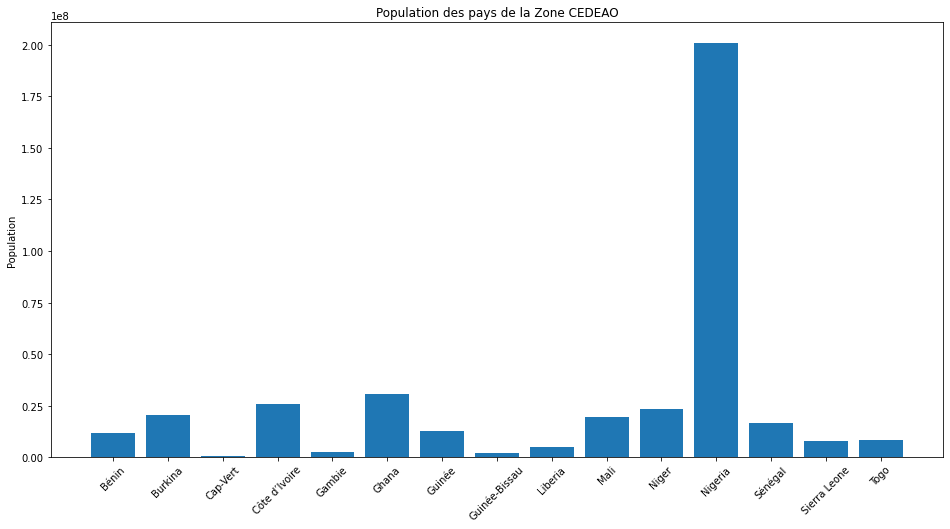

In [15]:
fig = plt.figure(figsize=(16, 8))
plt.bar(x="Pays", height="Population", data=data)
plt.xticks(rotation=45)
plt.ylabel("Population")
plt.title("Population des pays de la Zone CEDEAO")
plt.show()

## Let's get in touch
[![Github Badge](https://img.shields.io/badge/-Github-000?style=flat-square&logo=Github&logoColor=white&link=https://github.com/joekakone)](https://github.com/joekakone) [![Facebook Badge](https://img.shields.io/badge/-Facebook-blue?style=flat-square&logo=Facebook&logoColor=white&link=https://www.facebook.com/josephkonka1999)](https://www.facebook.com/josephkonka1999) [![Linkedin Badge](https://img.shields.io/badge/-LinkedIn-blue?style=flat-square&logo=Linkedin&logoColor=white&link=https://www.linkedin.com/in/joseph-koami-konka/)](https://www.linkedin.com/in/joseph-koami-konka/) [![Twitter Badge](https://img.shields.io/badge/-Twitter-blue?style=flat-square&logo=Twitter&logoColor=white&link=https://www.twitter.com/joekakone)](https://www.twitter.com/joekakone) [![Gmail Badge](https://img.shields.io/badge/-Gmail-c14438?style=flat-square&logo=Gmail&logoColor=white&link=mailto:joseph.kakone@gmail.com)](mailto:joseph.kakone@gmail.com)